# Assignment 3 part 1 

# Importing the dataset

In [1]:
import pandas as pd
file = "lyrics_raw"
df = pd.read_csv(r"C:\Users\ASUS\Downloads\lyrics_raw.csv")
df.head(20)

,track_name,artist,raw_lyrics,artist_verses
0,You Broke My Heart,Drake,"Yeah Yeah Oh, baby, don't go Don't go Look Loo...","Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook..."
1,First Person Shooter (feat. J. Cole),Drake,"[Intro: J. Cole & Adonis] (Pew, pew-pew) First...",Big as the what? (Ah)\nBig as the what? (Mm)\n...
2,MELTDOWN (feat. Drake),Drake,[Intro: Drake] Yeah Tensions is definitely ris...,Yeah\nTensions is definitely rising\nT'd up ri...
3,Slime You Out (feat. SZA),Drake,I don't know I don't know what's wrong with yo...,I don't know\nI don't know what's wrong with y...
4,On The Radar Freestyle,Drake,"Yeah On The Radar, 2023 6 G-O-D and my broski ...","Yeah\nOn The Radar, \n G-O-D and my broski \nC..."
5,Evil Ways (feat. J. Cole),Drake,"Yeah (Oh, baby, be honest with yourself) Yeah ...","Yeah (Oh, baby, be honest with yourself)\nYeah..."
6,Search & Rescue,Drake,"(I-I'm) SADPONY Ayy (I-I'm), yeah BNYX [Choru...","(I-I'm)\nSADPONY\nAyy (I-I'm), yeah\nBNYX\nI n..."
7,The Shoe Fits,Drake,"Yeah Y'all might want to skip this one, this i...","Yeah\nY'all might want to skip this one, this ..."
8,Jimmy Cooks (feat. 21 Savage),Drake,"Just awaken shaken once again, so you know it'...","Just awaken shaken once again, so you know it'..."
9,Fair Trade (with Travis Scott),Drake,I don't understand why you blame me Just take ...,I don't understand why you blame me\nJust take...


In [2]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'have', 'did', 'how', "shouldn't", 'themselves', 'any', 'about', 'ain', 'shan', 'myself', 'does', 'or', 'hadn', 'wasn', 'these', 'had', 'me', 'at', 'be', 'most', 'here', 'should', 'them', 'too', 'will', 'your', 'haven', "shan't", 'whom', 'm', 'hasn', 'off', 'he', 'very', 'when', 'ma', 'before', "won't", 'theirs', "didn't", 'some', 'all', 'of', 'because', 'who', 'what', 'while', 'this', 'down', 'a', 'they', 'only', 'she', 'on', 'there', "she's", "you're", 'being', 'until', 'couldn', 's', 'more', 'our', 'as', 'o', "you'd", 'it', 'against', 'can', 'not', 'her', 'been', "couldn't", "it's", 'y', 'if', 'that', 'in', 'out', "should've", 'doesn', "aren't", 'weren', 'were', 'why', 'so', 'few', 'won', 'wouldn', 'is', 'and', 'just', "isn't", 'll', 'i', 'each', 'further', "mightn't", 'between', 't', 'himself', 'during', 'its', 'same', "needn't", 'needn', "weren't", "wasn't", 'aren', 'didn', 'his', 'after', 'up', 'my', "hadn't", 'hers', 'through', 'ourselves', 'other', 'are', 'those', 'don', 'was'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Regex function

In [5]:
import regex as re# initialisation of the regex function

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['artist_verses'].apply(prepare, pipeline=pipeline)


# Intialisation of the counter

In [6]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)# Takes only first 10 values of the dataframe and prints the frequency of the tokens


,freq
token,
like,2577
got,1550
yeah,1439
know,1373
get,1316
see,977
ft,910
love,905
man,771


# Wordcloud

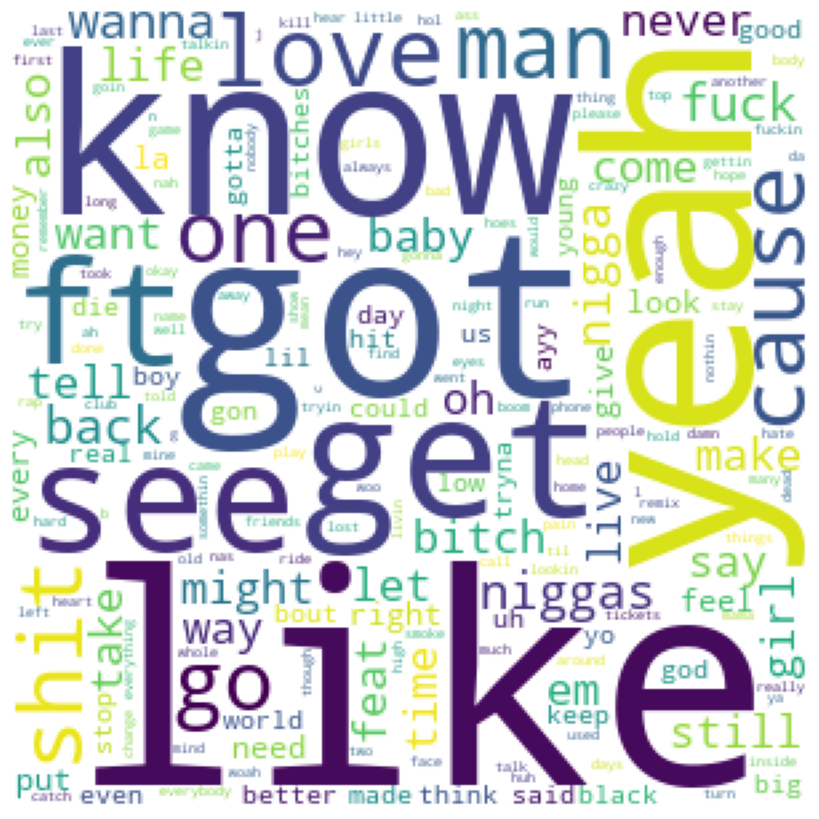

In [7]:
from wordcloud import WordCloud # intialisation of the wordcloud 
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show() # prints the wordcloud


# Doing TFIDF and comparing

In [8]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


In [9]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf'] # TFIDF = TF* IDF 
freq_df.head() # compares them both for the starting values of the dataframe

,freq,tfidf
token,,
like,2577,418.187647
got,1550,587.319148
yeah,1439,1011.611364
know,1373,572.595422
get,1316,501.938797


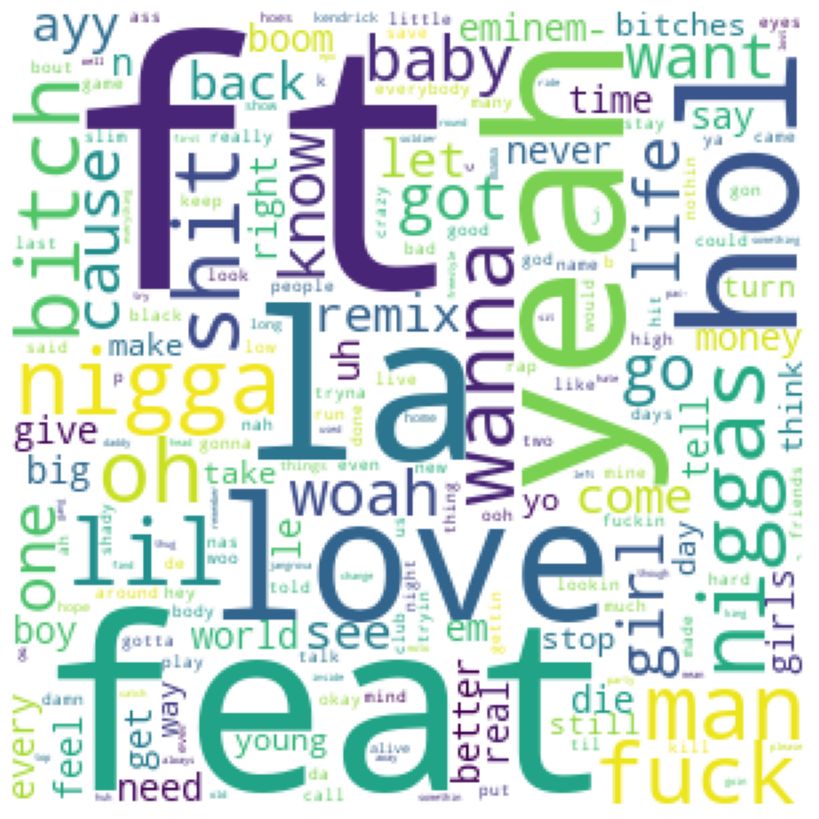

In [10]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show() # prints the wordcloud for the tfidf dataframe

# Genetraing heatmaps for the tokens

In [11]:
import pandas as pd
file = "lyrics_raw"
df = pd.read_csv(r"C:\Users\ASUS\Downloads\lyrics_raw.csv")
df.head(20)

,track_name,artist,raw_lyrics,artist_verses
0,You Broke My Heart,Drake,"Yeah Yeah Oh, baby, don't go Don't go Look Loo...","Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook..."
1,First Person Shooter (feat. J. Cole),Drake,"[Intro: J. Cole & Adonis] (Pew, pew-pew) First...",Big as the what? (Ah)\nBig as the what? (Mm)\n...
2,MELTDOWN (feat. Drake),Drake,[Intro: Drake] Yeah Tensions is definitely ris...,Yeah\nTensions is definitely rising\nT'd up ri...
3,Slime You Out (feat. SZA),Drake,I don't know I don't know what's wrong with yo...,I don't know\nI don't know what's wrong with y...
4,On The Radar Freestyle,Drake,"Yeah On The Radar, 2023 6 G-O-D and my broski ...","Yeah\nOn The Radar, \n G-O-D and my broski \nC..."
5,Evil Ways (feat. J. Cole),Drake,"Yeah (Oh, baby, be honest with yourself) Yeah ...","Yeah (Oh, baby, be honest with yourself)\nYeah..."
6,Search & Rescue,Drake,"(I-I'm) SADPONY Ayy (I-I'm), yeah BNYX [Choru...","(I-I'm)\nSADPONY\nAyy (I-I'm), yeah\nBNYX\nI n..."
7,The Shoe Fits,Drake,"Yeah Y'all might want to skip this one, this i...","Yeah\nY'all might want to skip this one, this ..."
8,Jimmy Cooks (feat. 21 Savage),Drake,"Just awaken shaken once again, so you know it'...","Just awaken shaken once again, so you know it'..."
9,Fair Trade (with Travis Scott),Drake,I don't understand why you blame me Just take ...,I don't understand why you blame me\nJust take...


In [13]:
import regex as re # Intialisation of the pipeline

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['artist_verses'].apply(prepare, pipeline=pipeline)

In [14]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
like,2577
got,1550
yeah,1439
know,1373
get,1316
see,977
ft,910
love,905
man,771


In [15]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]



In [16]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Heat map for all the tokens in the dataframe

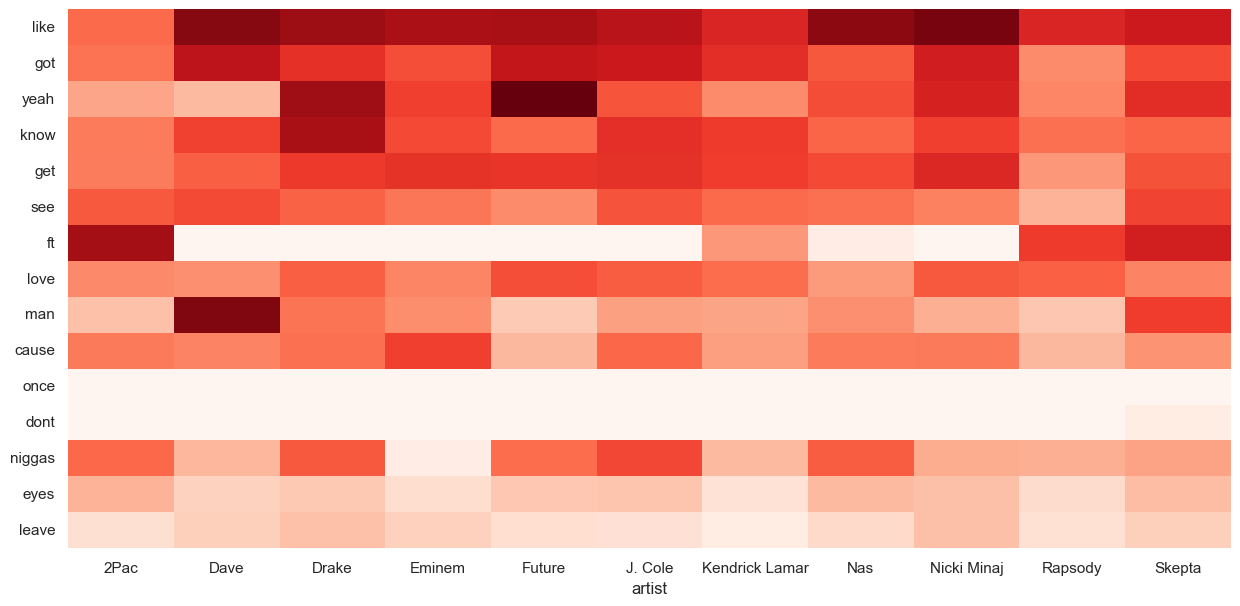

In [19]:
import seaborn as sns
keywords = ['like', 'got', 'yeah', 'know',
            'get', 'see', 'ft', 'love', 'man', 
            'cause', 'once', 'dont','niggas', 'eyes','leave']  
freq_df = count_keywords_by(df, by='artist', keywords=keywords)
# compute relative frequencies based on total number of tokens per artists
freq_df = freq_df.div(df.groupby('artist')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


# Fequency Heatmaps for the selected artists from the dataframe

# selecting 4 random artists from the dataframe

In [23]:
import pandas as pd

# Provide the correct file path
file_path = r"C:\Users\ASUS\Downloads\lyrics_raw.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# List of artists you want to filter for
artists_to_filter = ['Dave', 'Eminem','Future','Nas']  # Add more artists as needed

# Filter the DataFrame for the specified artists
df = df[df['artist'].isin(artists_to_filter)]
print(df)


                                 track_name  artist  \
50   From The D 2 The LBC (with Snoop Dogg)  Eminem   
51                              The Monster  Eminem   
52                              Mockingbird  Eminem   
53                               Without Me  Eminem   
54              Godzilla (feat. Juice WRLD)  Eminem   
..                                      ...     ...   
289                              Picture Me    Dave   
290                       Playing For Keeps    Dave   
291                               God's Eye    Dave   
292                                  100M's    Dave   
293                              Wanna Know    Dave   

                                            raw_lyrics  \
50   Yeah, it's been a minute... this probably shou...   
51   I'm friends with the monster that's under my b...   
52   Yeah I know sometimes Things may not always ma...   
53   Obie Trice, real name, no gimmicks Ra—, *recor...   
54   Ugh, you're a monster  [Verse 1: Eminem] I c

In [24]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):# same process for the generation of the tokens, Intialisation of the pipeline 
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['artist_verses'].apply(prepare, pipeline=pipeline)

In [25]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token' # It only counts the tokens from the text of the selected 4 artists
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
like,1111
got,631
yeah,591
get,517
know,435
man,425
see,330
shit,322
cause,309


# Claculating TFIDF and comparing

In [26]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [27]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
like,1111,163.875093
got,631,200.659358
yeah,591,416.311667
get,517,205.789192
know,435,188.522138


In [28]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [29]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Generating the heatmap for the same stopwords but for the selected 4 random artists

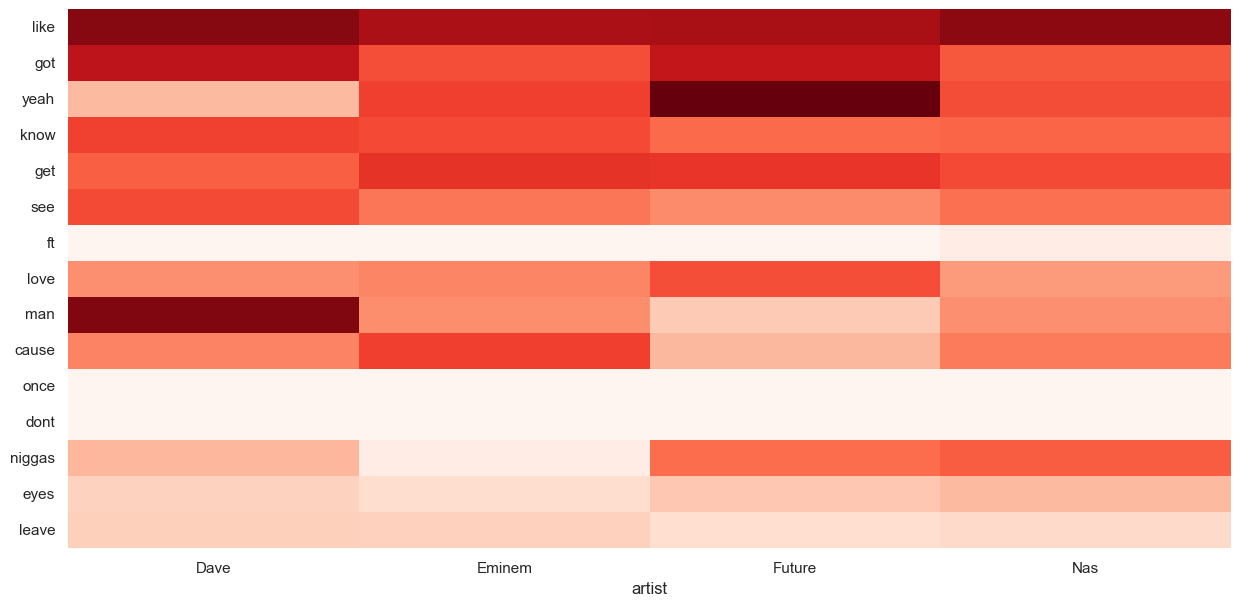

In [30]:
import seaborn as sns
keywords = ['like', 'got', 'yeah', 'know',
            'get', 'see', 'ft', 'love', 'man', 
            'cause', 'once', 'dont','niggas', 'eyes','leave']  
freq_df = count_keywords_by(df, by='artist', keywords=keywords)
# compute relative frequencies based on total number of tokens per artists
freq_df = freq_df.div(df.groupby('artist')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)